#Import

In [1]:
# if open from google colab, run this command
from google.colab import drive
drive.mount('/content/drive')
# %cd /content/drive/MyDrive/Github/sales-prediction-gru/ipynb
# %cd /content/drive/Shareddrives/BUAT\ DIEGO/Data-retail-2015-2022-keluar/

Mounted at /content/drive


In [ ]:
import os, warnings, random

import numpy as np
import pandas as pd

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import tensorflow as tf
import tensorflow.keras.layers as L
from tensorflow.keras import optimizers, Sequential, Model, callbacks
from tensorflow import keras
from keras.models import Sequential
from keras import Input
from keras.layers import Bidirectional, GRU, RepeatVector, Dense, TimeDistributed 

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline 

import plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

import joblib
from keras.models import load_model

# Set seeds to make the experiment more reproducible.
# def seed_everything(seed=0):
#     random.seed(seed)
#     np.random.seed(seed)
#     tf.random.set_seed(seed)
#     os.environ['PYTHONHASHSEED'] = str(seed)
#     os.environ['TF_DETERMINISTIC_OPS'] = '1'

# seed = 0
# seed_everything(seed)
# warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
# df2015 = pd.read_csv('./data-2015-renew.csv')
df2016 = pd.read_csv('./data-2016-renew.csv', parse_dates=['tgl'])
df2017 = pd.read_csv('./data-2017-renew.csv', parse_dates=['tgl'])
df2018 = pd.read_csv('./data-2018-renew.csv', parse_dates=['tgl'])
df2019 = pd.read_csv('./data-2019-renew.csv', parse_dates=['tgl'])
df2020 = pd.read_csv('./data-2020-renew.csv', parse_dates=['tgl'])
# df2021 = pd.read_csv('./data-2021-renew.csv', parse_dates=['tgl'])
# df2022 = pd.read_csv('./data-2022-renew.csv', parse_dates=['tgl'])

#Preprocessing

In [ ]:
# print("kodekategori 2016: ", df2016['kodekategori'].unique())
# print("kategori 2016: ", df2016['kategori'].unique())
# print("2017: ", df2017['kategori'].unique())
# print("2018: ", df2018['kategori'].unique())
# print("2019: ", df2019['kategori'].unique())
# print("2020: ", df2020['kategori'].unique())

In [ ]:
# get unique kategori value

group_kategori2016 = df2016.groupby('kodekategori')['kategori'].unique().reset_index()
group_kategori2017 = df2017.groupby('kodekategori')['kategori'].unique().reset_index()
group_kategori2018 = df2018.groupby('kodekategori')['kategori'].unique().reset_index()
group_kategori2019 = df2019.groupby('kodekategori')['kategori'].unique().reset_index()

pdList = [group_kategori2016, group_kategori2017, group_kategori2018, group_kategori2019]

new_kategori = pd.concat(pdList).reset_index(drop=True)
new_kategori['kodekategori'] = new_kategori['kodekategori'].astype(float)
new_kategori['kategori'] = new_kategori['kategori'].astype(str)

clean_kategori = new_kategori.drop_duplicates(subset=['kodekategori']).reset_index(drop=True)

In [ ]:
display(clean_kategori.T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108
kodekategori,101.00,102.00,103.00,104.00,105.00,106.00,107.00,108.00,109.00,110.00,111.00,112.00,113.00,114.00,115.00,201.00,202.00,203.00,204.00,205.00,206.00,301.00,302.00,10101.00,10102.00,10103.00,10104.00,10105.00,10106.00,10107.00,10108.00,10109.00,10110.00,10111.00,10112.00,10113.00,10114.00,10115.00,10116.00,10117.00,10118.00,10119.00,10120.00,10121.00,10201.00,10202.00,10203.00,10204.00,10205.00,10206.00,10207.00,10208.00,10209.00,10210.00,10211.00,10212.00,10213.00,20101.00,20201.00,20402.00,20501.00,20502.00,20503.00,20504.00,20601.00,30101.00,30201.00,30202.00,30203.00,30204.00,30301.00,30302.00,30303.00,30304.00,30305.00,30306.00,30307.00,30308.00,30309.00,30310.00,30311.00,30312.00,30401.00,30402.00,30403.00,30404.00,30405.00,30406.00,30407.00,40101.00,40103.00,40201.00,40202.00,40203.00,40301.00,40302.00,40303.00,40304.00,40305.00,40306.00,40307.00,40308.00,40309.00,40312.00,40401.00,40402.00,40403.00,40404.00,40405.00
kategori,['Baby Needs'],['Mens Care (2)'],['Healt & Beauty Care (3)'],['Kids Care (4)'],['Cleaning (5)'],['Homes (6)'],['Electronic & Tool kits (7)'],['Automotive (8)'],['Stationery (9)'],['Toys (10)'],['Sports (11)'],['Event Equipment (12)'],['Convection (13)'],['Shoes & Sandals (14)'],['Bag & Luggage (15)'],['Food (1)'],['Beverage (2)'],['Medicine (3)'],['Pets food (4)'],['Cigarette (5)'],['Fresh Food (6)'],['Others (1)'],['alisha collection'],['Makanan Bayi (Baby Food)'],['Bahan Kue (Baking Supplies)'],['Biskuit (Biscuit)'],['Roti dan Kue (Bread & Cake)'],['Sarapan Pagi (Breakfast)'],['Penganan Permen (Candy Confectionary)'],['Penganan Coklat (Chocolate Confectionary)'],['Makanan Mentah (Raw Food)'],['Ice'],['Makanan Masak (Cooked Food)'],['Bumbu Dapur (Seasoning)'],['Mie (Noodle)'],['Pasta'],['Makanan Ringan (Snack)'],['Beras (Rice)'],['Biji-bijian (Seeds)'],['Gula (Sugar)'],['Tepung (Flour)'],['Minyak Goreng (Cooking Oil)'],['Makanan Kaleng (Canned Food)'],['Makanan Hewan (Pet Food)'],['Susu (Milk)'],['Kopi (Coffe)'],['Teh (Tea)'],['Air (Water)'],['Minuman Buah (Juice)'],['Minuman Kesehatan (Healty Drink)'],['Minuman Berenergi (Energy Drink)'],['Minuman Isotonik (Isotonik Drink)'],['Minuman Penyegar (Refreshment)'],['Minuman Jeli (Jelly Drink)'],['Minuman Bersoda (Soft Drink)'],['Minuman Beralkohol (Alcoholic Drink)'],['Sirup (Syrup)'],['Buah (Fruit)'],['Sayur (Vegetable)'],['Air Tawar'],['Susu & Olahan (Dairy)'],['Harian (Daily)'],['Beku (Frozen)'],['Telur (Egg)'],['Produk Siap Makan (Ready To Eat)'],['Rokok (Cigarete)'],['Obat Dalam (Peroral)'],['Obat Luar (Topikal)'],['Vitamin & Suplemen (Vitamis & Supplements)'],['Alat Kesehatan (Health Appliance)'],['Perawatan Rambut (Hair Care)'],['Perawatan Wajah (Face Care)'],['Kosmetik (Cosmetic)'],['Tisu & Kapas (Tissues & Cotton)'],['Perawatan Gigi & Mulut (Oral Care)'],['Perawatan Tubuh (Body Care)'],['Perawatan Bayi (Baby Care)'],['Perawatan Anak (Kids Care)'],['Popok Bayi (Baby Diapers)'],['Pembalut Wanita (Sanitary Napkins)'],['Popok Dewasa (Adult Diapers)'],['Perawatan Pria (Mens Groming)'],['Perawatan Pakaian (Clothes Care)'],['Perawatan Dapur (Kitchen Care)'],['Perawatan Rumah (House Care)'],['Pengharum Rumah (Home Fragrances)'],['Pembasmi Serangga & Pengendali Hama (Insecti...,['Perawatan Tas & Sepatu Kulit (Leather Care)'],['Perawatan Otomotif (Automotive Care)'],['Mainan Lunak (Soft Toys)'],['Mainan Keras (Hard Toys)'],['Peralatan (Tools)'],['Perlengkapan (Supplies)'],['Fancies'],['Rumah Tangga (House Hold)'],['Dapur (Kitchen)'],['Kamar Mandi (Bath Room)'],['Kamar Tidur (Bed Room)'],['Peralatan & Perlengkapan Bayi (Equipment & B...,['Peralatan & Perlengkapan Sembahyang/Hari Ray...,['Peralatan Pertukangan (Tools kits)'

In [ ]:
# initiate the kategori list that will removed from dataset

kategori_remove_name = ["Fresh Food (6)", "Roti dan Kue (Bread & Cake)", "Sarapan Pagi (Breakfast)", "Makanan Mentah (Raw Food)", "Ice", "Makanan Masak (Cooked Food)", "Buah (Fruit)", "Sayur (Vegetable)", "Harian (Daily)", "Telur (Egg)", "Produk Siap Makan (Ready To Eat)"]
kategori_remove_list = ["206.00", "10104.00", "10105.00", "10108.00", "10109.00", "10110.00", "20101.00", "20201.00", "20502.00", "20504.00", "20601.00"]

In [ ]:
# drop unnecessary column

df2016 = df2016.drop(['notxn', 'nonota', 'namabarang', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'kodecustomer', 'iddistributor', 'idpromo', 'iddivisi', 'jenis', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)
df2017 = df2017.drop(['notxn', 'nonota', 'namabarang', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'kodecustomer', 'iddistributor', 'idpromo', 'iddivisi', 'jenis', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)
df2018 = df2018.drop(['notxn', 'nonota', 'namabarang', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'kodecustomer', 'iddistributor', 'idpromo', 'iddivisi', 'jenis', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)
df2019 = df2019.drop(['notxn', 'nonota', 'namabarang', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'kodecustomer', 'iddistributor', 'idpromo', 'iddivisi', 'jenis', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)

In [ ]:
# concat 3 dataframe to single df

df = pd.concat([df2016, df2017, df2018]).reset_index(drop=True)

In [ ]:
# remove strange value in each rows from barcode column

df['barcode'] = df['barcode'].str.split(' ').str[0]

In [ ]:
# create new column named "month_yr" to get number of month and year

# df['Year-Month'] = df['tgl'].apply(lambda x: x.strftime('%Y-%m')).astype(str)
df['month_yr'] = df['tgl'].apply(lambda x: x.strftime('%m-%y')).astype(str)

In [ ]:
# transform the value to number of month from all rows

df['month_yr'] = df['month_yr'].map({'01-16':0,'02-16':1,'03-16':2,'04-16':3,'05-16':4,'06-16':5,'07-16':6,'08-16':7,'09-16':8,'10-16':9,'11-16':10,'12-16':11,
                                          '01-17':12,'02-17':13,'03-17':14,'04-17':15,'05-17':16,'06-17':17,'07-17':18,'08-17':19,'09-17':20,'10-17':21,'11-17':22,'12-17':23,
                                          '01-18':24,'02-18':25,'03-18':26,'04-18':27,'05-18':28,'06-18':29,'07-18':30,'08-18':31,'09-18':32,'10-18':33,'11-18':34,'12-18':35})

In [ ]:
# df["barcode"] = df["barcode"].astype(str).astype(int)
# df["kodejenis"] = df["kodejenis"].astype(str).astype(float)

In [ ]:
display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8923868 entries, 0 to 8923867
Data columns (total 9 columns):
 #   Column        Dtype         
---  ------        -----         
 0   tgl           datetime64[ns]
 1   satuan        object        
 2   qty           float64       
 3   hargajual     float64       
 4   barcode       object        
 5   kodejenis     object        
 6   kodekategori  float64       
 7   kategori      object        
 8   month_yr      int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 612.8+ MB


None

,tgl,satuan,qty,hargajual,barcode,kodejenis,kodekategori,kategori,month_yr
0,2016-10-28 12:09:33.220,PCS,4.00,4200.00,8991038110354,10507,105.00,Cleaning (5),9
1,2016-01-02 15:51:33.187,PCS,1.00,10050.00,4902430400664,10304,103.00,Healt & Beauty Care (3),0
2,2016-07-22 18:48:08.593,PCS,1.00,4000.00,8992772198011,10506,105.00,Cleaning (5),6
3,2016-06-24 11:46:13.417,PCS,1.00,4750.00,8992933621112,20102,201.00,Food (1),5
4,2016-11-06 13:57:40.160,PCS,2.00,15300.00,3014260842956,10307,103.00,Healt & Beauty Care (3),10


In [ ]:
# drop unnecessary kategori

# init = df.copy()
# init = init[~init['kategori'].isin(kategori_remove_name)].reset_index(drop=True)
df = df[~df['kategori'].isin(kategori_remove_name)].reset_index(drop=True)

#EDA

In [ ]:
df.head()

,tgl,satuan,qty,hargajual,barcode,kodejenis,kodekategori,kategori,month_yr
0,2016-10-28 12:09:33.220,PCS,4.00,4200.00,8991038110354,10507,105.00,Cleaning (5),9
1,2016-01-02 15:51:33.187,PCS,1.00,10050.00,4902430400664,10304,103.00,Healt & Beauty Care (3),0
2,2016-07-22 18:48:08.593,PCS,1.00,4000.00,8992772198011,10506,105.00,Cleaning (5),6
3,2016-06-24 11:46:13.417,PCS,1.00,4750.00,8992933621112,20102,201.00,Food (1),5
4,2016-11-06 13:57:40.160,PCS,2.00,15300.00,3014260842956,10307,103.00,Healt & Beauty Care (3),10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8616845 entries, 0 to 8616844
Data columns (total 9 columns):
 #   Column        Dtype         
---  ------        -----         
 0   tgl           datetime64[ns]
 1   satuan        object        
 2   qty           float64       
 3   hargajual     float64       
 4   barcode       object        
 5   kodejenis     object        
 6   kodekategori  float64       
 7   kategori      object        
 8   month_yr      int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 591.7+ MB


In [ ]:
barcode_u = len(pd.unique(df['barcode']))
jenis_u = len(pd.unique(df['kodejenis']))
kategori_u = len(pd.unique(df['kodekategori']))
print('Unique Barcode:',barcode_u)
print('Unique Kode Jenis:',jenis_u)
print('Unique Kode Kategori:',kategori_u)

Unique Barcode: 30239
Unique Kode Jenis: 165
Unique Kode Kategori: 23


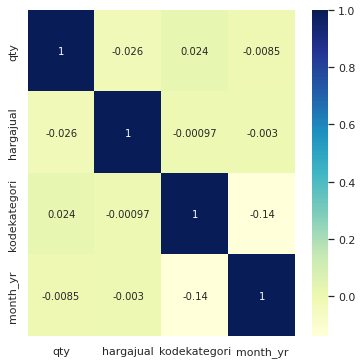

In [ ]:
corr = df.corr()
top_corr_features = corr.index[abs(corr["qty"])>0]

plt.figure(figsize=(6,6))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="YlGnBu")

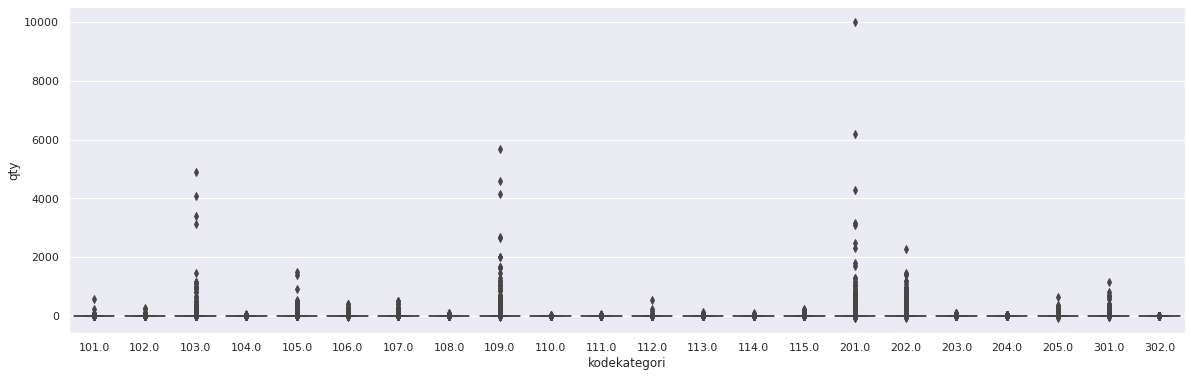

In [ ]:
sns.set(rc={'figure.figsize':(20,6)})
sns.boxplot(x='kodekategori', y='qty', data=df)

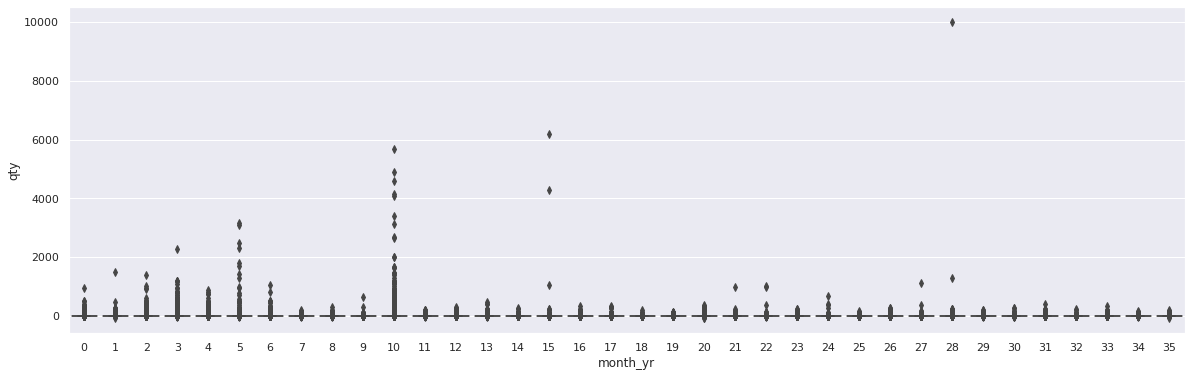

In [ ]:
sns.set(rc={'figure.figsize':(20,6)})
sns.boxplot(x='month_yr', y='qty', data=df)

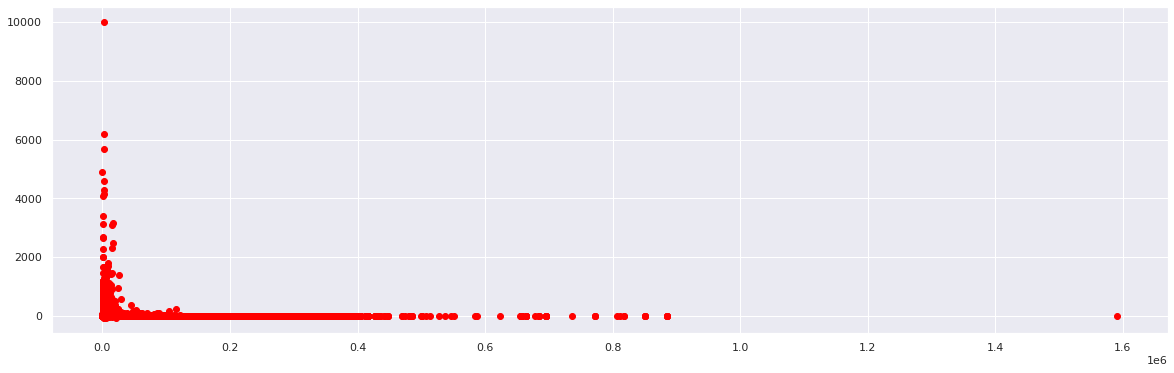

In [ ]:
plt.scatter(df['hargajual'], df['qty'], color = "red")
plt.show()

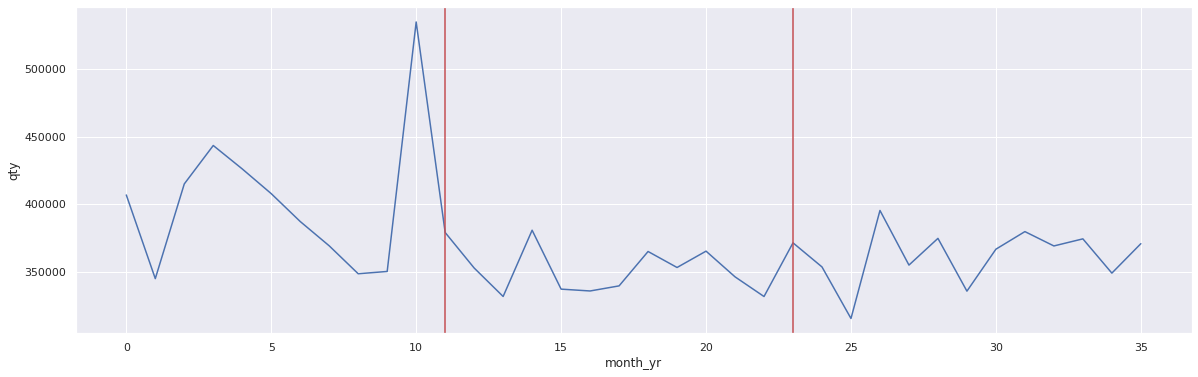

In [ ]:
df_plot = df.groupby(['month_yr'],as_index=False).sum()
df_plot.head()
sns.set(rc={'figure.figsize':(20,6)})
sns.lineplot(x='month_yr', y='qty', data=df_plot)
plt.axvline(x=11, ymin=0, ymax=1, color='r')
plt.axvline(x=23, ymin=0, ymax=1, color='r')

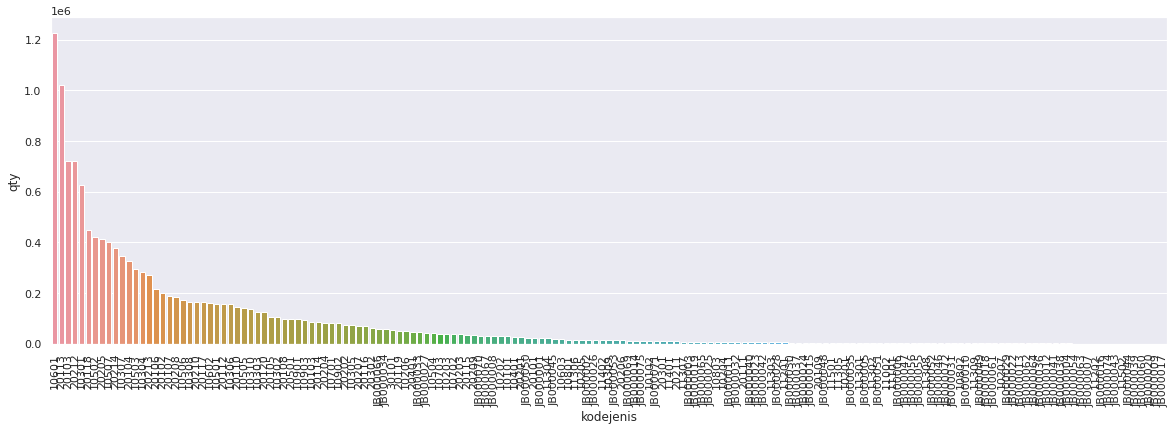

In [ ]:
df_s = df.groupby(['kodejenis'],as_index=False).sum().sort_values("qty", ascending=False)
sns.set(rc={'figure.figsize':(20,6)})
sns.barplot(x='kodejenis', y='qty', data=df_s, )
plt.xticks(rotation=90)
plt.show()

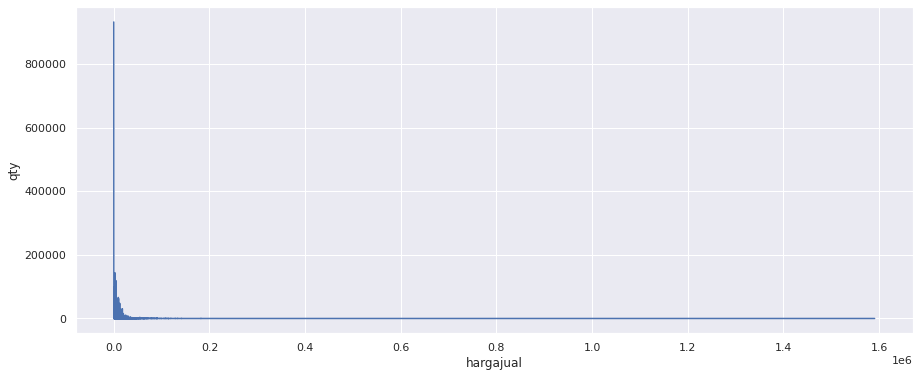

In [ ]:
df_p = df.groupby(['hargajual'],as_index=False).sum()
sns.set(rc={'figure.figsize':(15,6)})
sns.lineplot(x='hargajual', y='qty', data=df_p)

In [ ]:
# Handling Outliers
# df = df[df['hargajual'] < 6000]
# df = df[df['qty'] < 4000]

In [ ]:
# drop rows wich contains negative and zero values
df[df['qty']<0].count()

tgl             794
satuan          794
qty             794
hargajual       794
barcode         794
kodejenis       794
kodekategori    794
kategori        794
month_yr        794
dtype: int64

In [ ]:
df = df[df['qty']>0]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



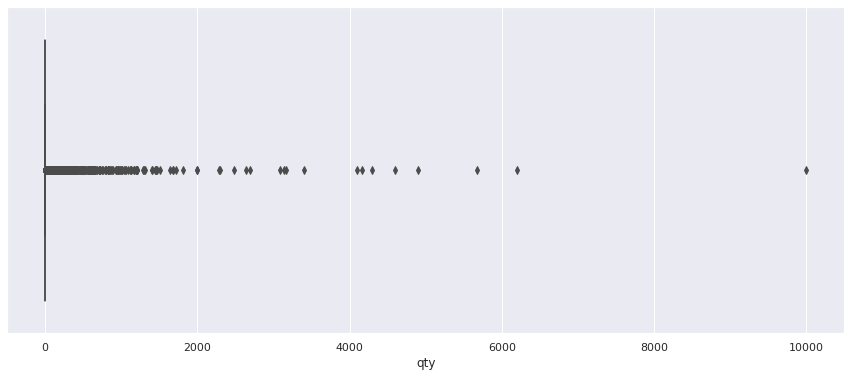

In [ ]:
# reviewing the outlier of the number of products sold
ax = sns.boxplot(df['qty'])

In [ ]:
df.info() # 8616845 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8616017 entries, 0 to 8616844
Data columns (total 9 columns):
 #   Column        Dtype         
---  ------        -----         
 0   tgl           datetime64[ns]
 1   satuan        object        
 2   qty           float64       
 3   hargajual     float64       
 4   barcode       object        
 5   kodejenis     object        
 6   kodekategori  float64       
 7   kategori      object        
 8   month_yr      int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 657.3+ MB


# DF 2016 - 2018

In [ ]:
train_monthly = df[['tgl', 'month_yr', 'kodejenis', 'barcode', 'qty']].copy()
train_monthly = train_monthly.sort_values('tgl').groupby(['month_yr', 'kodejenis', 'barcode'], as_index=False)
train_monthly = train_monthly.agg({'qty':['sum']})
train_monthly.columns = ['month_yr', 'kodejenis', 'barcode', 'qty_cnt']
train_monthly = train_monthly.query('qty_cnt >= 0 and qty_cnt <= 50')

train_monthly['qty_cnt_month'] = train_monthly.sort_values('month_yr').groupby(['barcode', 'kodejenis'])['qty_cnt'].shift(-1)

display(train_monthly.head())

,month_yr,kodejenis,barcode,qty_cnt,qty_cnt_month
0,0,10101,4902430600835,1.00,4.00
1,0,10101,4902430600859,2.00,2.00
2,0,10101,4902430601023,2.00,1.00
3,0,10101,4902430601191,4.00,6.00
4,0,10101,4902430601207,8.00,4.00


In [ ]:
monthly_series = train_monthly.pivot_table(index=['barcode', 'kodejenis'], columns='month_yr',values='qty_cnt', fill_value=0).reset_index()
monthly_series.head()

month_yr,barcode,kodejenis,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
0,0000003624241,JB000034,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,00113731,JB000067,12.03,4.82,6.13,4.16,4.84,4.40,6.23,6.69,4.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,00125789,JB000066,0.00,0.00,4.94,0.40,0.00,0.00,17.06,1.29,13.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,00126588,JB000066,0.00,0.00,0.00,0.00,0.00,6.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,00129213,JB000066,42.88,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
first_month = 23
last_month = 35
serie_size = 12
data_series = []

for index, row in monthly_series.iterrows():
    for month1 in range((last_month - (first_month + serie_size)) + 1):
        serie = [row['barcode'], row['kodejenis']]
        for month2 in range(serie_size + 1):
            serie.append(row[month1 + first_month + month2])
        data_series.append(serie)

columns = ['barcode', 'kodejenis']
[columns.append(i) for i in range(serie_size)]
columns.append('label')

data_series = pd.DataFrame(data_series, columns=columns)
data_series.head()

,barcode,kodejenis,0,1,2,3,4,5,6,7,8,9,10,11,label
0,0000003624241,JB000034,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,00113731,JB000067,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,00125789,JB000066,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,00126588,JB000066,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,00129213,JB000066,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
data_series = data_series.drop(['barcode', 'kodejenis'], axis=1)

In [ ]:
labels = data_series['label']
data_series.drop('label', axis=1, inplace=True)
train, valid, Y_train, Y_valid = train_test_split(data_series, labels.values, test_size=0.10, random_state=0)

In [ ]:
print("Train set", train.shape)
print("Validation set", valid.shape)
train.head()

Train set (31457, 12)
Validation set (3496, 12)


,0,1,2,3,4,5,6,7,8,9,10,11
12465,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
18585,24.00,22.00,25.00,19.00,24.00,25.00,18.00,15.00,29.00,28.00,26.00,24.00
25653,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
10766,8.00,5.00,7.00,4.00,2.00,2.00,2.00,8.00,2.00,3.00,2.00,7.00
23837,16.00,24.00,15.00,17.00,8.00,16.00,18.00,21.00,10.00,6.00,12.00,4.00


In [ ]:
X_train = train.values.reshape((train.shape[0], train.shape[1], 1))
X_valid = valid.values.reshape((valid.shape[0], valid.shape[1], 1))

print("Train set reshaped", X_train.shape)
print("Validation set reshaped", X_valid.shape)

Train set reshaped (31457, 12, 1)
Validation set reshaped (3496, 12, 1)


In [ ]:
serie_size =  X_train.shape[1] # 12
n_features =  X_train.shape[2] # 1

epochs = 1000
batch = 128
lr = 0.0001

gru_model = Sequential()
gru_model.add(L.GRU(10, input_shape=(serie_size, n_features), return_sequences=True))
gru_model.add(L.GRU(6, activation='relu', return_sequences=True))
gru_model.add(L.GRU(1, activation='relu'))
gru_model.add(L.Dense(10, kernel_initializer='glorot_normal', activation='relu'))
gru_model.add(L.Dense(10, kernel_initializer='glorot_normal', activation='relu'))
gru_model.add(L.Dense(1))
gru_model.summary()

adam = optimizers.Adam(lr)
gru_model.compile(loss='mse', optimizer=adam)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_6 (GRU)                 (None, 12, 10)            390       
                                                                 
 gru_7 (GRU)                 (None, 12, 6)             324       
                                                                 
 gru_8 (GRU)                 (None, 1)                 27        
                                                                 
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 882
Trainable params: 882
Non-trainable 

In [ ]:
early_stop = callbacks.EarlyStopping(patience = 10)
gru_history = gru_model.fit(X_train, Y_train, 
                              validation_data=(X_valid, Y_valid), 
                              batch_size=batch, 
                              epochs=epochs, 
                              verbose=2,
                              callbacks=[early_stop])

Epoch 1/1000
246/246 - 10s - loss: 78.5766 - val_loss: 76.1953 - 10s/epoch - 41ms/step
Epoch 2/1000
246/246 - 4s - loss: 74.5975 - val_loss: 67.8768 - 4s/epoch - 17ms/step
Epoch 3/1000
246/246 - 4s - loss: 58.2877 - val_loss: 46.4446 - 4s/epoch - 17ms/step
Epoch 4/1000
246/246 - 4s - loss: 41.5584 - val_loss: 34.5477 - 4s/epoch - 17ms/step
Epoch 5/1000
246/246 - 4s - loss: 32.7657 - val_loss: 28.4796 - 4s/epoch - 17ms/step
Epoch 6/1000
246/246 - 4s - loss: 29.5074 - val_loss: 27.0858 - 4s/epoch - 18ms/step
Epoch 7/1000
246/246 - 5s - loss: 28.7573 - val_loss: 26.6822 - 5s/epoch - 20ms/step
Epoch 8/1000
246/246 - 4s - loss: 28.3633 - val_loss: 26.4104 - 4s/epoch - 17ms/step
Epoch 9/1000
246/246 - 4s - loss: 28.0380 - val_loss: 26.1903 - 4s/epoch - 17ms/step
Epoch 10/1000
246/246 - 4s - loss: 27.8025 - val_loss: 26.0279 - 4s/epoch - 17ms/step
Epoch 11/1000
246/246 - 7s - loss: 27.6018 - val_loss: 25.8988 - 7s/epoch - 30ms/step
Epoch 12/1000
246/246 - 4s - loss: 27.4547 - val_loss: 25.802

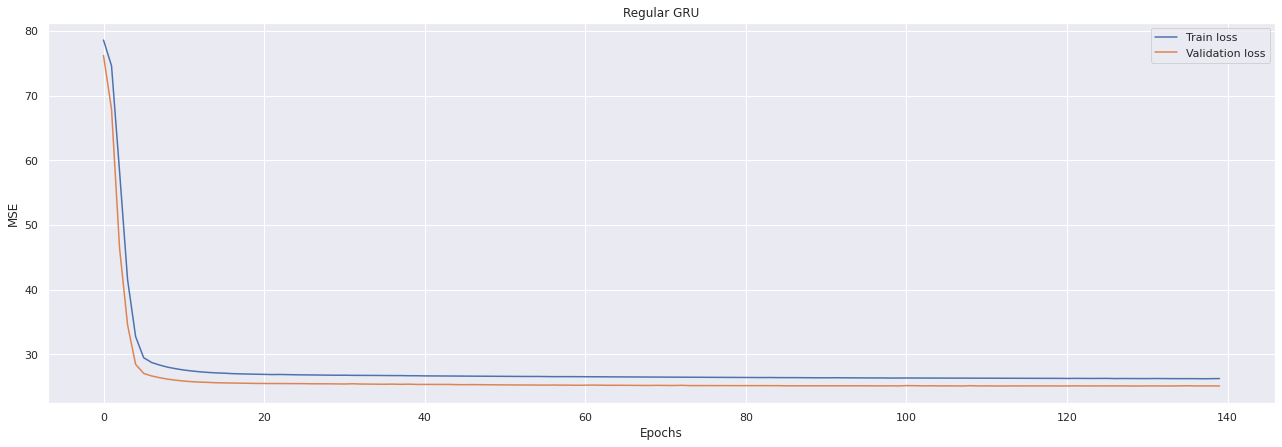

In [ ]:
fig, ax1 = plt.subplots(1, sharey=True,figsize=(22,7))

ax1.plot(gru_history.history['loss'], label='Train loss')
ax1.plot(gru_history.history['val_loss'], label='Validation loss')
ax1.legend(loc='best')
ax1.set_title('Regular GRU')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('MSE')

plt.show()

In [ ]:
lstm_train_pred = gru_model.predict(X_train)
lstm_val_pred = gru_model.predict(X_valid)
print('Train rmse:', np.sqrt(mean_squared_error(Y_train, lstm_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_valid, lstm_val_pred)))

Train rmse: 5.121793775360905
Validation rmse: 5.014131804374869


In [ ]:
# save model to single file
gru_model.save('gru_model.h5')

# Test - web

In [ ]:
# data preprocessing for prediction

testing = df2019.copy()

testing['month_yr'] = testing['tgl'].apply(lambda x: x.strftime('%m-%y')).astype(str)

testing['month_yr'] = testing['month_yr'].map({'01-19':0,'02-19':1,'03-19':2,'04-19':3,'05-19':4,'06-19':5,'07-19':6,'08-19':7,'09-19':8,'10-19':9,'11-19':10,'12-19':11})

test_monthly = testing[['tgl', 'month_yr', 'kodejenis', 'barcode', 'qty']]
test_monthly = test_monthly.sort_values('tgl').groupby(['month_yr', 'kodejenis', 'barcode'], as_index=False)
test_monthly = test_monthly.agg({'qty':['sum']})
test_monthly.columns = ['month_yr', 'kodejenis', 'barcode', 'qty_cnt']
test_monthly = test_monthly.query('qty_cnt >= 0 and qty_cnt <= 50')

# Label
test_monthly['qty_cnt_month'] = test_monthly.sort_values('month_yr').groupby(['barcode', 'kodejenis'])['qty_cnt'].shift(-1)

test_monthly_series = test_monthly.pivot_table(index=['barcode', 'kodejenis'], columns='month_yr',values='qty_cnt', fill_value=0).reset_index()

In [ ]:
# display(test_monthly_series.nunique())
display(test_monthly_series.head(20))

month_yr,barcode,kodejenis,0,1,2,3,4,5,6,7,8,9,10,11
0,00100809,01011601,18.69,15.35,20.38,13.80,7.03,8.72,11.13,11.36,16.29,7.11,10.22,11.02
1,00113731,02020101,0.00,0.00,2.60,3.46,4.43,4.75,6.09,4.07,5.42,4.27,4.89,3.76
2,00125789,02010120,0.72,0.00,0.00,0.00,0.00,9.06,0.00,0.00,0.00,0.00,0.00,0.00
3,00129213,02010113,7.61,15.97,10.74,6.98,10.05,0.00,0.00,0.00,0.00,0.00,17.51,0.00
4,00133210,02010113,2.34,2.78,2.00,5.75,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.24
5,00133227,02010113,0.00,0.00,0.00,0.00,5.32,0.00,0.00,0.00,0.12,0.00,0.00,0.00
6,00133241,02010102,47.21,22.26,25.34,39.23,0.00,0.00,0.00,44.44,34.87,42.87,28.54,25.48
7,00133470,02010132,15.71,15.73,29.56,1.19,3.72,3.15,27.29,6.63,26.60,26.99,31.12,8.97
8,00133494,02010121,0.00,22.69,37.22,0.00,31.28,0.00,12.30,0.44,8.12,0.00,9.26,22.21
9,00149457,02010123,24.29,25.32,40.39,33.03,27.94,36.84,21.97,26.18,21.59,0.00,19.86,39.54


In [ ]:
# get 5 products for prediction

product_list = ['00100809', '00133470', '00133210', '00163422', '00165181']
df_pred = test_monthly_series[test_monthly_series['barcode'].isin(product_list)].reset_index(drop=True)

In [ ]:
df_pred

month_yr,barcode,kodejenis,0,1,2,3,4,5,6,7,8,9,10,11
0,00100809,01011601,18.69,15.35,20.38,13.80,7.03,8.72,11.13,11.36,16.29,7.11,10.22,11.02
1,00133210,02010113,2.34,2.78,2.00,5.75,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.24
2,00133470,02010132,15.71,15.73,29.56,1.19,3.72,3.15,27.29,6.63,26.60,26.99,31.12,8.97
3,00163422,02010105,17.55,27.49,25.58,18.86,14.83,20.22,24.75,18.98,21.39,13.17,16.04,18.24
4,00165181,02010128,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9.40,0.00,0.00


In [ ]:
df_pred.to_csv('df_pred.csv', index=False)

In [ ]:
# drop unnecessary column

X = df_pred.drop_duplicates(subset=['barcode', 'kodejenis'])
# X = test_monthly_series.drop_duplicates(subset=['barcode', 'kodejenis'])
# X_test = pd.merge(clean_test, latest_records, on=['barcode'], how='left', suffixes=['', '_'])
X.fillna(0, inplace=True)
X.drop(['barcode', 'kodejenis'], axis=1, inplace=True)

In [ ]:
X.head()

month_yr,0,1,2,3,4,5,6,7,8,9,10,11
0,18.69,15.35,20.38,13.80,7.03,8.72,11.13,11.36,16.29,7.11,10.22,11.02
1,2.34,2.78,2.00,5.75,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.24
2,15.71,15.73,29.56,1.19,3.72,3.15,27.29,6.63,26.60,26.99,31.12,8.97
3,17.55,27.49,25.58,18.86,14.83,20.22,24.75,18.98,21.39,13.17,16.04,18.24
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9.40,0.00,0.00


In [ ]:
# reshape the predict dataset

X_reshaped = X.values.reshape((X.shape[0], X.shape[1], 1))
print(X_reshaped.shape)

(5, 12, 1)


In [ ]:
# predict the dataset

model_pred = gru_model.predict(X_reshaped)

In [ ]:
# get back the barcode to pairing the prediction

barcode_pred = df_pred[['barcode']]
# barcode_pred = test_monthly_series[['barcode']]

prediction = pd.DataFrame(barcode_pred['barcode'], columns=['barcode'])
prediction['prediction_next_month'] = pd.DataFrame(model_pred)
prediction.head()

# pred.to_csv('gru_submission.csv', index=False)

,barcode,prediction_next_month
0,00100809,12.42
1,00133210,0.21
2,00133470,15.82
3,00163422,19.21
4,00165181,1.00


In [ ]:
# test = prediction.head()

In [ ]:
# test.to_csv('test_result.csv', index=False)

In [ ]:
# # save the model to disk
# filename = 'gru_model.sav'
# joblib.dump(gru_model, filename)
 
# # load the model from disk
# loaded_model = joblib.load(filename)
# result = loaded_model.predict(X_test, Y_test)
# print(result)

# Test

In [ ]:
test = df2019.drop(['tgl', 'satuan', 'qty', 'kodejenis', 'kodekategori'], axis=1)

In [ ]:
test.head()

In [ ]:
clean_test = test.drop_duplicates(subset=['barcode'])

In [ ]:
latest_records = monthly_series.drop_duplicates(subset=['barcode'])
X_test = pd.merge(clean_test, latest_records, on=['barcode'], how='left', suffixes=['', '_'])
X_test.fillna(0, inplace=True)
X_test.drop(['barcode', 'kodejenis'], axis=1, inplace=True)

In [ ]:
X_test.head()

In [ ]:
X_test = X_test[[(i + (36 - serie_size)) for i in range(serie_size)]]
X_test.head()

In [ ]:
X_test_reshaped = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))
print(X_test_reshaped.shape)

In [ ]:
lstm_test_pred = gru_model.predict(X_test_reshaped)

In [ ]:
lstm_prediction = pd.DataFrame(clean_test['barcode'], columns=['barcode'])
lstm_prediction['item_cnt_month'] = lstm_test_pred.clip(0., 50.)
lstm_prediction.head()
# lstm_prediction.to_csv('gru_submission.csv', index=False)

In [ ]:
lstm_prediction.head(100)

In [ ]:
# lstm_train_pred = gru_model.predict(X_train)
# lstm_val_pred = gru_model.predict(X_valid)
# print('Train rmse:', np.sqrt(mean_squared_error(Y_train, lstm_train_pred)))
# print('Validation rmse:', np.sqrt(mean_squared_error(Y_valid, lstm_val_pred)))

# lstm_test_pred = gru_model.predict(X_valid)
# print('Validation rmse:', np.sqrt(mean_squared_error(Y_valid, lstm_test_pred)))